# Masks

dmpixel masks


In [1]:
#source /export/CIAOT/ciaot_install/20180306/ciao-4.10/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

## Setup


In [2]:
/bin/rm -rf 16136
download_chandra_obsid 16136 evt1,pbk,bias,bpix,flt,fov,msk,mtl,asol,dtf,stat 


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      205 Mb  ####################            3 s  64491.1 kb/s
  asol     fits       24 Mb  ####################          < 1 s  27609.6 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  49392.7 kb/s
  stat     fits        3 Mb  ####################          < 1 s  31583.1 kb/s
  bias     fits      491 Kb  ####################          < 1 s  19788.7 kb/s
  bias     fits      450 Kb  ####################          < 1 s  21773.7 kb/s
  bias     fits      431 Kb  ####################          < 1 s  23087.0 kb/s
  bias     fits      419 Kb  ####################          < 1 s  16382.7 kb/s
  bpix     fits       28 Kb  ####################          < 1 s  1947.5 kb/s
  fov      fits        7 Kb  ####################          < 1 s  539.4 kb/s
  flt      fits        6 Kb  ####################       

In [3]:
chandra_repro 16136 ./ clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/masks/16136'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 17 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/masks/acisf16136_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local

In [4]:
fluximage acisf16136_repro_evt2.fits out=abell2626 bin=1 clob+ psfecf=0.9

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf16136_001N001_asol1.fits found.
Bad-pixel file acisf16136_repro_bpix1.fits found.
Mask file acisf16136_001N003_msk1.fits found.

The output images will have 2100 by 4325 pixels, pixel size of 0.492 arcsec,
    and cover x=3088.5:5188.5:1,y=1706.5:6031.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 16136
Creating 4 instrument maps for obsid 16136
Creating 4 exposure maps for obsid 16136
Combining 4 exposure maps for obsid 16136
Thresholding data for obsid 16136
Exposure-correcting image for obsid 16136
Creating PSF map for obsid 16136

The following files were created:

 The clipped counts image is:
     abell2626_broad_thresh.img

 The clipped exposure map is:
     abell2626_broad_thresh.expmap

 The PSF map is:
     abell2626_broad_thresh.psfmap

 The exposure-corrected image is:
     abell2626_broad_flux.img



In [5]:
#mkpsfmap abell2626_broad_thresh.img abell2626_broad.psfmap energy=2.3 ecf=0.9 clob+

In [6]:
punlearn wavdetect wrecon wtransform
pset wavdetect \
  infile=abell2626_broad_thresh.img \
  expfile=abell2626_broad_thresh.expmap \
  psffile=abell2626_broad_thresh.psfmap \
  outfile=abell2626.srcs \
  scellfile=abell2626.cells \
  imagefile=abell2626.recon \
  defnbkgfile=abell2626.nbkg \
  scales="1.4 2.0 4.0 8.0 12.0 16.0" \
  interdir=`pwd` clobber=yes

wavdetect mode=h


[1] 6955
[1]+  Done                    ds9 abell2626_broad_thresh.img -region abell2626.srcs -block 4 -scale log -saveimage png ds9_01.png


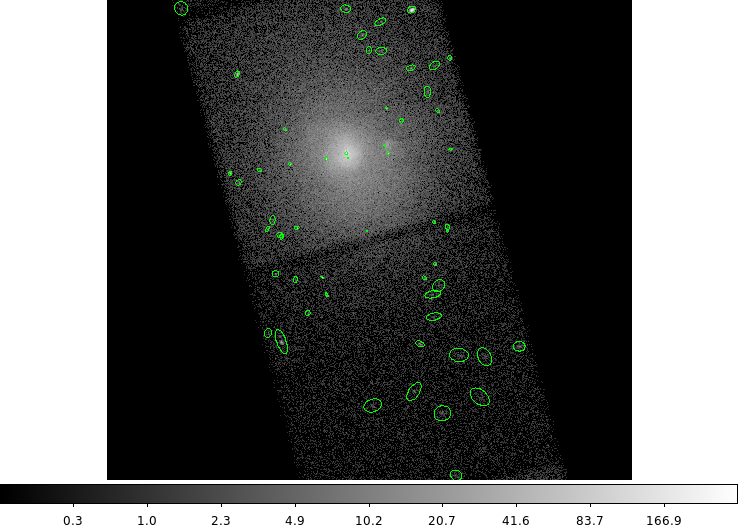

In [7]:
ds9 abell2626_broad_thresh.img -region abell2626.srcs \
  -block 4 -scale log -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

## Traditional way: regions


In [8]:
python -c 'from region import *;src=CXCRegion("abell2626.srcs");(field()-src).write("excluded_srcs.reg",fits=True,clobber=True);'
dmlist excluded_srcs.reg"[#row=1:5]" data,clean


Region Block: Field()&!Ellipse(4111.96,2756,27.5003,24.0959,115.223)&!Ellipse(3951.3,3719.56,6.42102,3.40998,126.953)&!Ellipse(4403.63,3773.54,6.51762,4.9292,164.678)&!Ellipse(3790.33,3882.92,11.4101,7.56801,81.8236)
#  POS(X,Y)                                 SHAPE              R[2]                                     ROTANG[2]                                COMPONENT
                                  NaN NaN Field                                               NaN NaN                                  NaN NaN          1
              4111.9611650485      2756.0 !Ellipse                  27.5003337860        24.0958766937                       115.2232360840 NaN          1
      3951.3040935673      3719.5614035088 !Ellipse                   6.4210228920         3.4099793434                       126.9527511597 NaN          1
      4403.6296296296      3773.5432098765 !Ellipse                   6.5176234245         4.9291977882                       164.6782531738 NaN          1
      3

In [9]:
dmcopy "abell2626_broad_thresh.img[sky=region(excluded_srcs.reg)]" image_point_srcs_removed_regions clob+

[1] 7077
[1]+  Done                    ds9 image_point_srcs_removed_regions -region excluded_srcs.reg -block 4 -scale log -saveimage png ds9_02.png


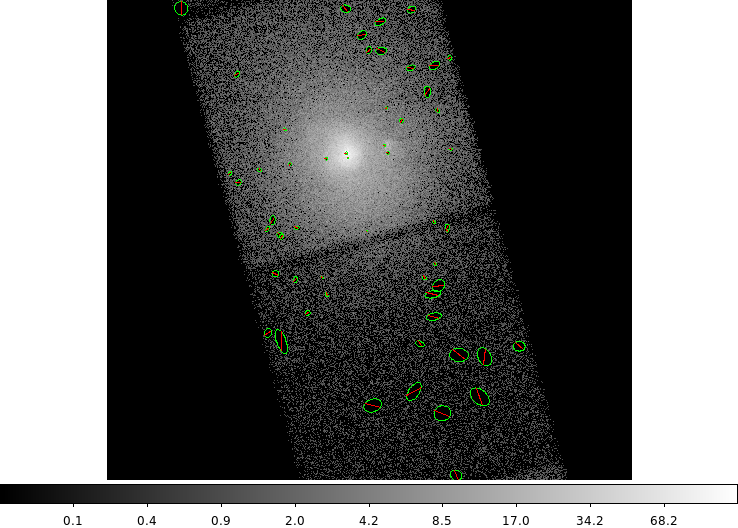

In [10]:
ds9 image_point_srcs_removed_regions -region excluded_srcs.reg \
  -block 4 -scale log -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

In [11]:
dmlist image_point_srcs_removed_regions subspace


 
--------------------------------------------------------------------------------
Data subspace for block EVENTS_IMAGE: Components: 3 Descriptors: 17 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 sky                  Real8               Rectangle(3088.5,1706.5,5188.5,6031.5)&!Ellipse(4111.96,2756,27.5003,24.0959,115.223)&!Ellipse(3951.3,3719.56,6.42102,3.40998,126.953)&!Ellipse(4403.63,3773.54,6.51762,4.9292,164.678)&!Ellipse(3790.33,3882.92,11.4101,7.56801,81.8236)&!Ellipse(4130.26,3905.47,3.45655,2.50034,101.599)&!Ellipse(3732.98,3912.9,11.2455,6.21996,60.9637)&!Ellipse(3850.06,3917.7,9.23236,7.19514,13.5605)&!Ellipse(4398.22,3940.63,8.22292,5.29508,148.626)&!Ellipse(3582.72,4135.44,9.6198,6.23803,76.9147)&!Ellipse(3822.38,4173.19,7.54269,5.33875,110.211)&!Ellipse(3967.88,4194.16,5.7766,5.44011,43.025)&!Ellipse(4047.87,4216.18,5.5322,5.06669,49.6533)&!Ellipse(4215.2,4217.3,6.75448,5.53103,15.551)&!Ellipse(4465.41,4231.

In [12]:
dmextract image_point_srcs_removed_regions"[sky=region(acisf16136_repro_fov1.fits)][bin sky=annulus(4077.3,4269.7,0:600:10)]" \
  exp="abell2626_broad_thresh.expmap" \
  out=radial_profile_with_regions_from_image mode=h op=generic clob+


# dmextract (CIAO 4.14): WARNING: Input file, "image_point_srcs_removed_regions[sky=region(acisf16136_repro_fov1.fits)]", has no rows in it.



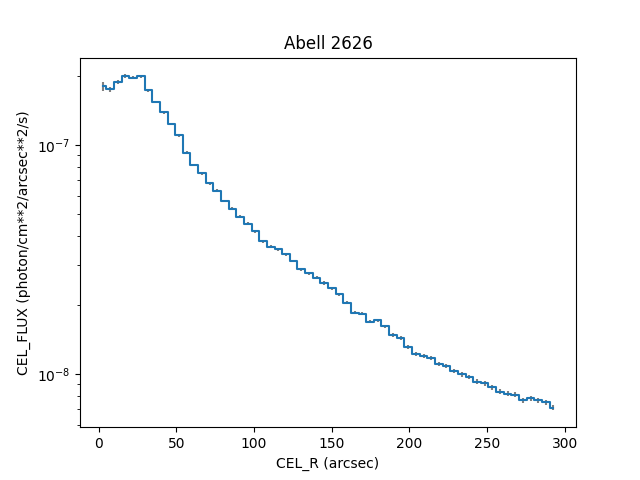

In [13]:
#cat << EOM > c1.py
#make_figure("radial_profile_with_regions_from_image[cols cel_r,cel_flux]","histogram")
#log_scale(Y_AXIS)
#print_window("chips_01.png","export.clobber=True")
#quit()
#EOM

cat << EOM > c1.py
from pycrates import *
import matplotlib.pylab as plt

tab=read_file("radial_profile_with_regions_from_image")
x = tab.get_column("cel_rmid").values
y = tab.get_column("cel_flux").values
e = tab.get_column("cel_flux_err").values

plt.errorbar(x,y,yerr=e, drawstyle="steps-mid", ecolor="gray")
plt.yscale("log")
plt.xlabel("CEL_R (arcsec)")
plt.ylabel("CEL_FLUX (photon/cm**2/arcsec**2/s)")
plt.title("Abell 2626")
plt.savefig("chips_01.png")
EOM

python c1.py
display < chips_01.png

## Using pixel masks

In [14]:
dmimgcalc abell2626_broad_thresh.img none ones.fits op="imgout=(1+(img1-img1))" clob+

In [15]:
dmstat ones.fits sig- cen- med-

ones.fits
    min:	1 	      @:	( 3089 1707 )
    max:	1 	      @:	( 3089 1707 )
   mean:	1 
    sum:	9082500 
   good:	9082500 
   null:	0 


In [16]:
dmcopy "ones.fits[sky=region(abell2626.srcs)][opt full,update=no]" srcs.mask clob+


[1] 7450
[1]+  Done                    ds9 srcs.mask -block 4 -saveimage png ds9_03.png


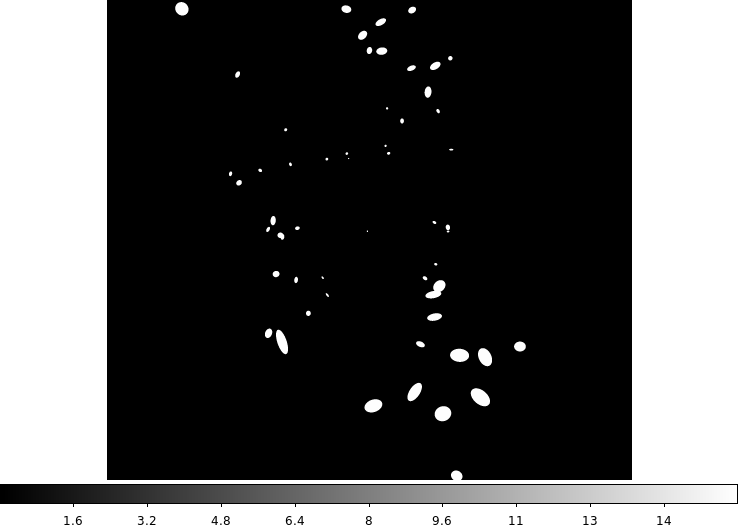

In [17]:
ds9 srcs.mask -block 4 -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

In [18]:
dmimgcalc srcs.mask none no_srcs.mask op="imgout=(1-img1)" clob+

[1] 7533
[1]+  Done                    ds9 no_srcs.mask -block 4 -saveimage png ds9_04.png


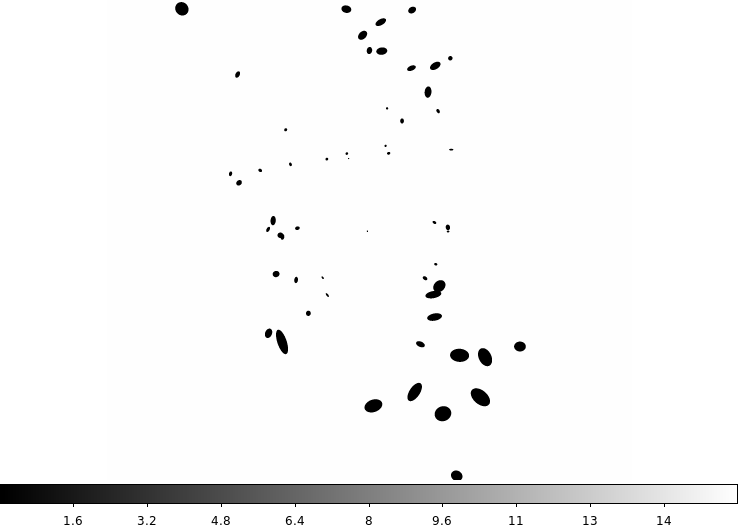

In [19]:
ds9 no_srcs.mask -block 4 -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png


In [20]:
dmimgthresh no_srcs.mask out=no_srcs_with_fov.mask \
  exp=abell2626_broad_thresh.expmap \
  cut=1 value=0 clob+

[1] 7580
[1]+  Done                    ds9 no_srcs_with_fov.mask -block 4 -saveimage png ds9_05.png


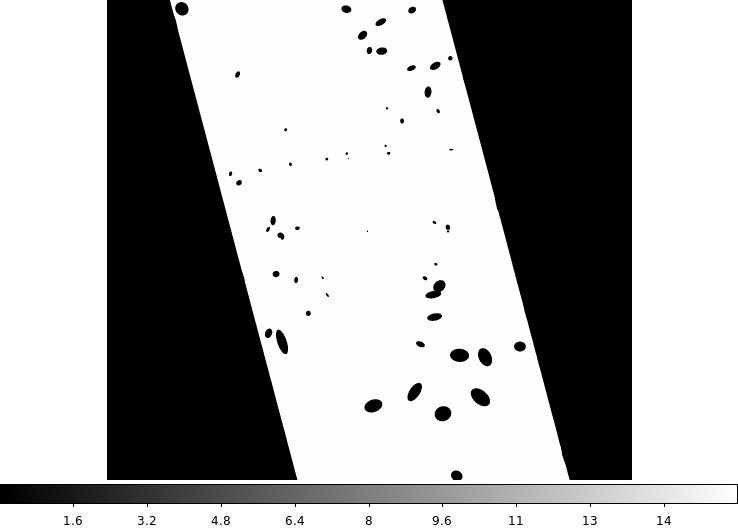

In [21]:
ds9 no_srcs_with_fov.mask -block 4 -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit

display < ds9_05.png


### Visualize

[1] 7622
[1]+  Done                    ds9 abell2626_broad_thresh.img -scale log -block 4 -scale log -pan to 4077.3 4269.7 physical -mask color green -mask transparency 60 -mask no_srcs_with_fov.mask -saveimage png ds9_06.png


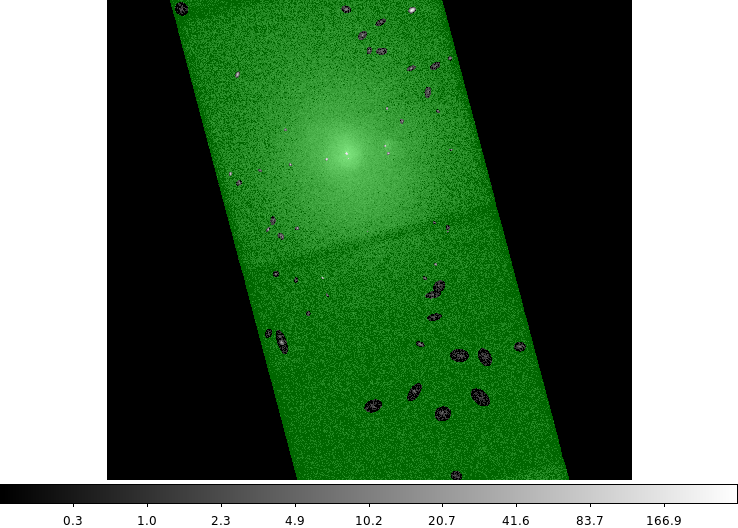

In [22]:
ds9 abell2626_broad_thresh.img -scale log \
  -block 4 -scale log -pan to 4077.3 4269.7 physical \
  -mask color green -mask transparency 60 -mask no_srcs_with_fov.mask\
  -saveimage png ds9_06.png &
sleep 10
xpaset -p ds9 quit


display < ds9_06.png


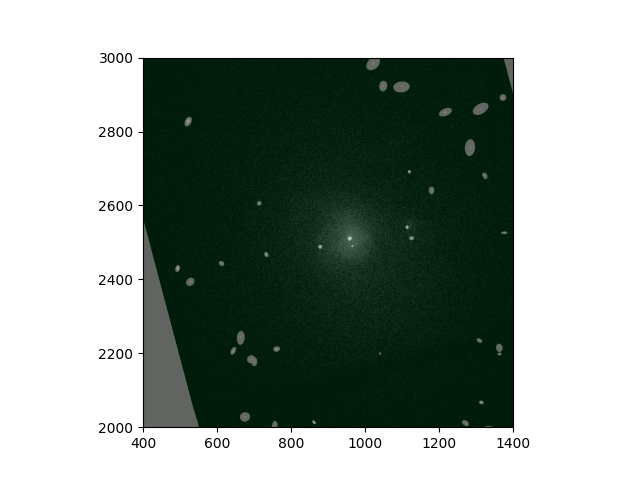

In [23]:
cat << EOM > c2.py

import matplotlib.pylab as plt
from pycrates import read_file
from crates_contrib.utils import scale_image_crate

cr = read_file("abell2626_broad_thresh.img")
scale_image_crate(cr,"asinh")
pixels = cr.get_image().values
msk = read_file("no_srcs_with_fov.mask").get_image().values


plt.imshow(pixels, cmap="gray", origin="lower", aspect="equal")
plt.imshow(msk, cmap="Greens", alpha=0.4, origin="lower", aspect="equal")
plt.xlim(400,1400)
plt.ylim(2000,3000)
plt.savefig("chips_02.png")
EOM

python c2.py
display < chips_02.png


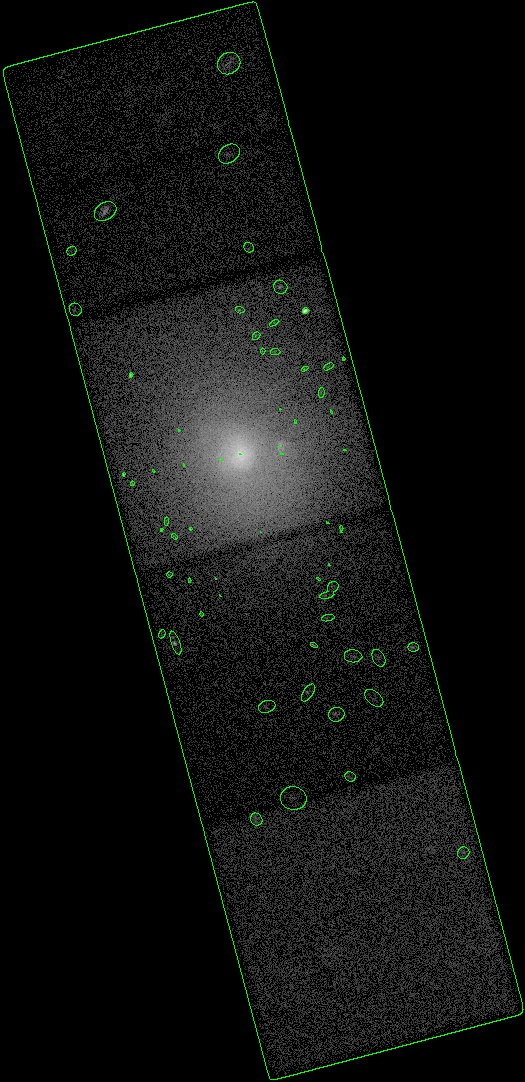

In [24]:
dmimg2jpg infile="abell2626_broad_thresh.img[bin sky=4]" \
  outfile=dmimg2jpg_40.jpg \
  regionfile="mask(no_srcs_with_fov.mask[bin sky=4])" \
  regioncolor=")colors.green" mode=h clob+

display < dmimg2jpg_40.jpg


### Filtering

In [25]:
dmcopy "abell2626_broad_thresh.img[sky=mask(no_srcs_with_fov.mask)][opt full]" image_with_mask clob+

In [26]:
dmlist image_with_mask subspace

 
--------------------------------------------------------------------------------
Data subspace for block EVENTS_IMAGE: Components: 3 Descriptors: 17 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 sky                  Real8               TABLE MASK
                                              MASK(MASK)
                                              Field area = 9.0825e+06 Region area = 4.32497e+06

                          [ 1] x              
                                                   3088.50:     5188.50
                          [ 2] y              
                                                   1706.50:     6031.50
   2 expno                Int4                3:35762 
   3 ccd_id               Int2                5:5,7:7 
   4 node_id              Int2                0:3 
   5 chipx                Int2                1:1024 
   6 chipy                Int2                1:1024 
   7 tdetx               

In [27]:
dmlist image_with_mask blocks

 
--------------------------------------------------------------------------------
Dataset: image_with_mask
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: EVENTS_IMAGE                   Image      Int4(2100x4325)
Block    2: MASK                           Image      Byte(2100x4325)


[1] 7756
[1]+  Done                    ds9 image_with_mask -scale log -block 4 -scale log -pan to 4077.3 4269.7 physical -mask color green -mask transparency 60 -mask "image_with_mask[mask]" -saveimage png ds9_07.png


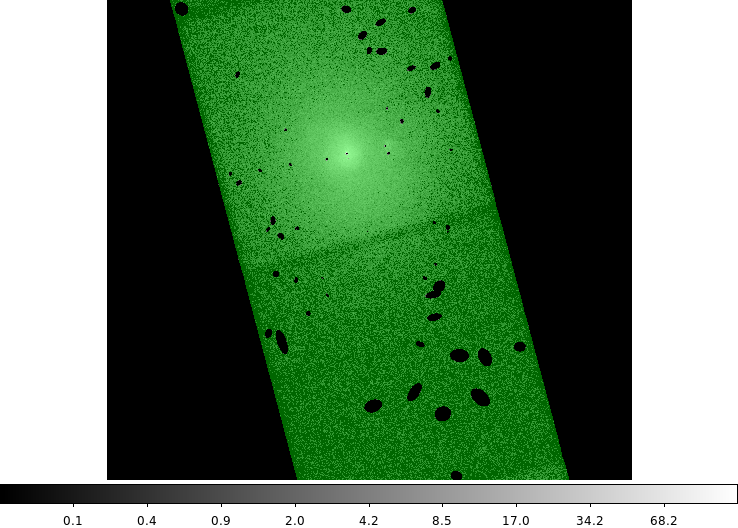

In [28]:
ds9 image_with_mask -scale log -block 4 -scale log \
  -pan to 4077.3 4269.7 physical \
  -mask color green -mask transparency 60 -mask "image_with_mask[mask]" \
  -saveimage png ds9_07.png &
sleep 10
xpaset -p ds9 quit


display < ds9_07.png
  


### Make radial profile


In [29]:
 dmextract "image_with_mask[bin sky=annulus(4077.3,4269.7,0:600:10)]" \
  exp="abell2626_broad_thresh.expmap" \
  out=radial_profile_with_mask_from_image mode=h op=generic clob+


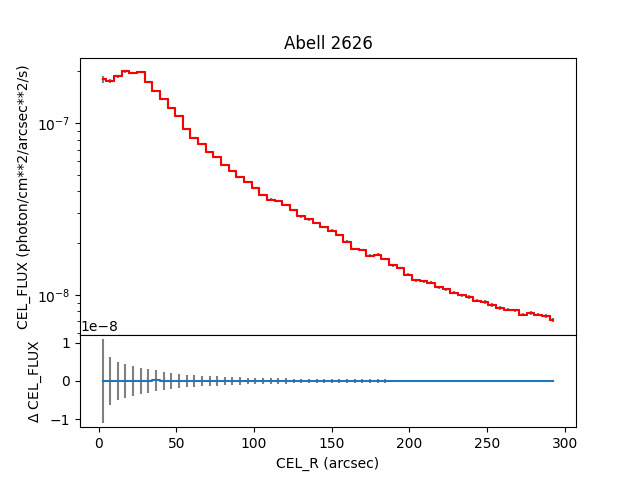

In [30]:
cat << EOM > c3.py
from pycrates import read_file
import matplotlib.pylab as plt
import numpy as np

a = read_file("radial_profile_with_mask_from_image")
ax = a.get_column("cel_rmid").values
ay = a.get_column("cel_flux").values
ae = a.get_column("cel_flux_err").values

b = read_file("radial_profile_with_regions_from_image")
bx = b.get_column("cel_rmid").values
by = b.get_column("cel_flux").values
be = b.get_column("cel_flux_err").values

grid = plt.GridSpec(4, 1, wspace=0.0, hspace=0.0)
plt.subplot(grid[0:3,0])
plt.errorbar(ax,ay,yerr=ae, drawstyle="steps-mid", ecolor="gray")
plt.errorbar(bx,by,yerr=be, drawstyle="steps-mid", ecolor="gray", color="red")
plt.yscale("log")
plt.ylabel("CEL_FLUX (photon/cm**2/arcsec**2/s)")
plt.title("Abell 2626")

plt.subplot(grid[3,0])
delta = ay - by
quad = np.sqrt(ae*ae + be*be)
plt.errorbar(ax,delta,yerr=quad, drawstyle="steps-mid", ecolor="gray")
plt.xlabel("CEL_R (arcsec)")
plt.ylabel(r"$\Delta$ CEL_FLUX")
plt.savefig("chips_03.png")
EOM


python c3.py
display < chips_03.png



In [31]:
dmdiff radial_profile_with_regions_from_image"[cols cel_flux]" radial_profile_with_mask_from_image"[cols cel_flux]" sub- key- || echo 

Infile 1:  radial_profile_with_regions_from_image[cols cel_flux]
Infile 2:  radial_profile_with_mask_from_image[cols cel_flux]

----------------------------------------------------------------------
Compare Tables
----------------------------------------------------------------------
Compare Table Structure:
  Block name: HISTOGRAM
Compare Column Details:
Compare Virtual Column Details:
Compare Column Data:
Column:          Row:           Message:                                                        Value(s):                    Diff:
---------------- -------------- -------------------------------------- ---------------------------------- ------------------------
CEL_FLUX                8       Values are not equal                   1.53753214275507e-07  1.53903186975023e-07 +1.49973e-10 (+0.0975%)
CEL_FLUX               19       Values are not equal                   4.84464259512242e-08  4.84501810502616e-08  +3.7551e-12 (+0.00775%)
CEL_FLUX               34       Values are not equ

## FOV edges

In [32]:
dmcopy "ones.fits[sky=region(acisf16136_repro_fov1.fits)][opt full,update=no]" \
  fov.mask clob+


[1] 7967
[1]+  Done                    ds9 fov.mask -block 4 -saveimage png ds9_08.png


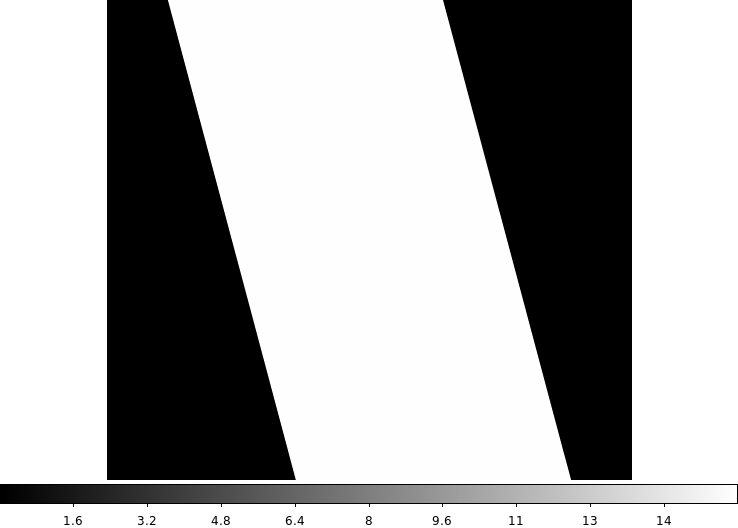

In [33]:
ds9 fov.mask -block 4 -saveimage png ds9_08.png &
sleep 10
xpaset -p ds9 quit

display < ds9_08.png


In [34]:
dmimgcalc no_srcs.mask fov.mask no_srcs_fov.mask op=mul clob+

[1] 8010
[1]+  Done                    ds9 no_srcs_fov.mask -block 4 -saveimage png ds9_09.png


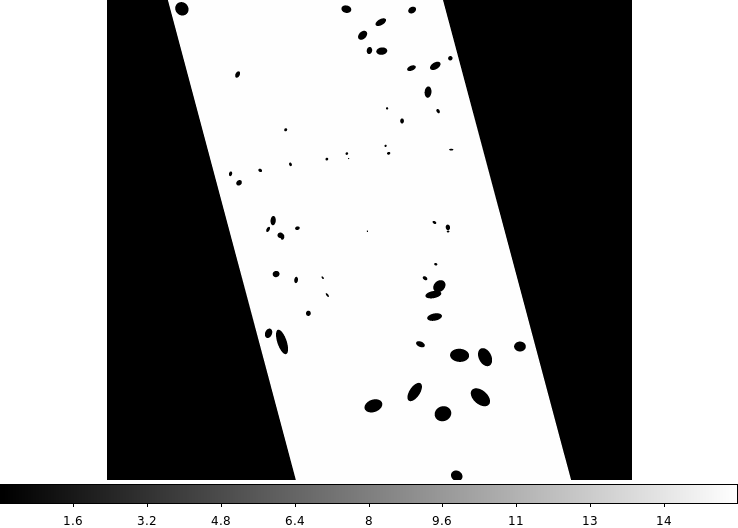

In [35]:
ds9 no_srcs_fov.mask -block 4 -saveimage png ds9_09.png &
sleep 10
xpaset -p ds9 quit

display < ds9_09.png


In [36]:
dmimgcalc no_srcs_fov.mask no_srcs_with_fov.mask diff_fov.mask op=sub clob+


[1] 8083
[1]+  Done                    ds9 diff_fov.mask -block 4 -scale limits -1 1 -cmap load $ASCDS_CONTRIB/data/004-phase.lut -saveimage png ds9_10.png


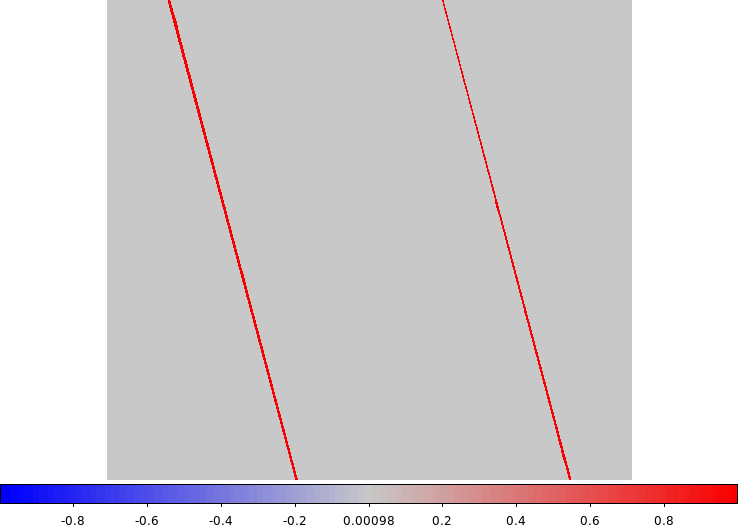

In [37]:
ds9 diff_fov.mask -block 4 -scale limits -1 1 \
  -cmap load $ASCDS_CONTRIB/data/004-phase.lut \
  -saveimage png ds9_10.png &
sleep 10
xpaset -p ds9 quit


display < ds9_10.png

In [38]:
dmextract "abell2626_broad_thresh.img[sky=mask(no_srcs_fov.mask)][bin sky=annulus(4077.3,4269.7,0:600:10)]" \
  exp="abell2626_broad_thresh.expmap" \
  out=radial_profile_with_mask_from_image2 mode=h op=generic clob+

# dmextract (CIAO 4.14): WARNING: Input file, "abell2626_broad_thresh.img[sky=mask(no_srcs_fov.mask)]", has no rows in it.



In [39]:
dmdiff radial_profile_with_regions_from_image"[cols cel_flux]" radial_profile_with_mask_from_image2"[cols cel_flux]"  key- sub- || echo 

Infile 1:  radial_profile_with_regions_from_image[cols cel_flux]
Infile 2:  radial_profile_with_mask_from_image2[cols cel_flux]

----------------------------------------------------------------------
Compare Tables
----------------------------------------------------------------------
Compare Table Structure:
  Block name: HISTOGRAM
Compare Column Details:
Compare Virtual Column Details:
Compare Column Data:
Column:          Row:           Message:                                                        Value(s):                    Diff:
---------------- -------------- -------------------------------------- ---------------------------------- ------------------------
CEL_FLUX                8       Values are not equal                   1.53753214275507e-07  1.53903186975023e-07 +1.49973e-10 (+0.0975%)
CEL_FLUX               19       Values are not equal                   4.84464259512242e-08  4.84501810502616e-08  +3.7551e-12 (+0.00775%)
CEL_FLUX               34       Values are not eq

## With events

In [40]:
dmcopy "acisf16136_repro_evt2.fits[sky=mask(no_srcs_with_fov.mask),energy=500:7000]" \
  events_point_srcs_removed_mask clob+

In [41]:
dmlist events_point_srcs_removed_mask subspace

 
--------------------------------------------------------------------------------
Data subspace for block EVENTS: Components: 4 Descriptors: 16 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 time                 Real8               TABLE GTI7
                                              
                                              498642950.2600968480:498755270.7022039890
   2 expno                Int4                3:35762 
   3 ccd_id               Int2                7:7 
   4 node_id              Int2                0:3 
   5 chip                 [ 1] chipx          1:1024 
   5 chip                 [ 2] chipy          1:1024 
   6 tdet                 [ 1] tdetx          1:8192 
   6 tdet                 [ 2] tdety          1:8192 
   7 det                  [ 1] detx               0.50:     8192.50 
   7 det                  [ 2] dety               0.50:     8192.50 
   8 sky                  Real4               

In [42]:
dmlist events_point_srcs_removed_mask blocks

 
--------------------------------------------------------------------------------
Dataset: events_point_srcs_removed_mask
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: EVENTS                         Table        16 cols x 325746   rows
Block    3: GTI7                           Table         2 cols x 1        rows
Block    4: GTI5                           Table         2 cols x 1        rows
Block    5: GTI6                           Table         2 cols x 5        rows
Block    6: GTI8                           Table         2 cols x 5        rows
Block    7: MASK                           Image      Byte(2100x4325)


In [43]:
dmextract events_point_srcs_removed_mask"[bin sky=annulus(4077.3,4269.7,0:600:10)]" \
  exp="abell2626_broad_thresh.expmap" \
  out=radial_profile_with_mask mode=h op=generic clob+


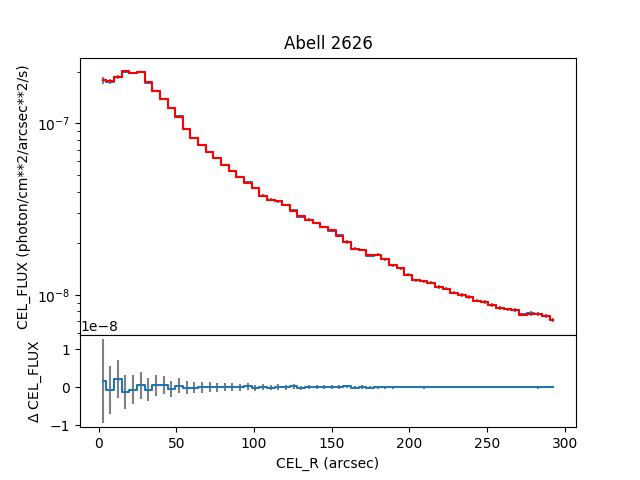

In [44]:
cat << EOM > c4.py
from pycrates import read_file
import matplotlib.pylab as plt
import numpy as np

a = read_file("radial_profile_with_mask_from_image")
ax = a.get_column("cel_rmid").values
ay = a.get_column("cel_flux").values
ae = a.get_column("cel_flux_err").values

b = read_file("radial_profile_with_mask")
bx = b.get_column("cel_rmid").values
by = b.get_column("cel_flux").values
be = b.get_column("cel_flux_err").values

grid = plt.GridSpec(4, 1, wspace=0.0, hspace=0.0)
plt.subplot(grid[0:3,0])
plt.errorbar(ax,ay,yerr=ae, drawstyle="steps-mid", ecolor="gray")
plt.errorbar(bx,by,yerr=be, drawstyle="steps-mid", ecolor="gray", color="red")
plt.yscale("log")
plt.ylabel("CEL_FLUX (photon/cm**2/arcsec**2/s)")
plt.title("Abell 2626")

plt.subplot(grid[3,0])
delta = ay - by
quad = np.sqrt(ae*ae + be*be)
plt.errorbar(ax,delta,yerr=quad, drawstyle="steps-mid", ecolor="gray")
plt.xlabel("CEL_R (arcsec)")
plt.ylabel(r"$\Delta$ CEL_FLUX")
plt.savefig("chips_04.png")
EOM


python c4.py
display < chips_04.png

